# Predection of MPG for automobile

Import all the lib

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression , LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import joblib
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error , r2_score , mean_squared_error, mean_absolute_percentage_error
import pickle

Read the data from the path 

In [2]:
df = pd.read_csv('data/auto-mpg.csv')


## Understand the Data

In [3]:
print(df.describe())

              mpg   cylinders  displacement  horsepower       weight  \
count  398.000000  398.000000    398.000000  398.000000   398.000000   
mean    23.514573    5.454774    193.425879  104.145729  2970.424623   
std      7.815984    1.701004    104.269838   38.307044   846.841774   
min      9.000000    3.000000     68.000000   46.000000  1613.000000   
25%     17.500000    4.000000    104.250000   75.000000  2223.750000   
50%     23.000000    4.000000    148.500000   92.000000  2803.500000   
75%     29.000000    8.000000    262.000000  125.000000  3608.000000   
max     46.600000    8.000000    455.000000  230.000000  5140.000000   

       acceleration  model year      origin  
count    398.000000  398.000000  398.000000  
mean      15.568090   76.010050    1.572864  
std        2.757689    3.697627    0.802055  
min        8.000000   70.000000    1.000000  
25%       13.825000   73.000000    1.000000  
50%       15.500000   76.000000    1.000000  
75%       17.175000   79.0000

In [4]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


Listing the columns of the Data Set

In [5]:
list(df.columns)

['mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model year',
 'origin',
 'car name']

Droping unwanted items from the data set (car name)

In [6]:
df.drop(labels = ['car name'],axis = 1, inplace = True )

In [7]:
list(df.columns)

['mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model year',
 'origin']

## Engineering the Features

In [8]:
df['power_weight_ratio'] = df['horsepower']/df['weight']
df['displacement_per_cylinder'] = df['displacement']/df['cylinders']
df['power_weight'] = df['horsepower']*df['weight']
df['displacement_power_weight'] = df['horsepower']*df['weight']*df['displacement']

In [8]:
list(df.columns)

['mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model year',
 'origin']

## Data analysis


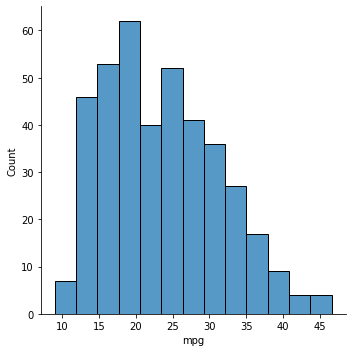

In [9]:
sns.displot(df['mpg'])

Display all the columns as relationship with MPG

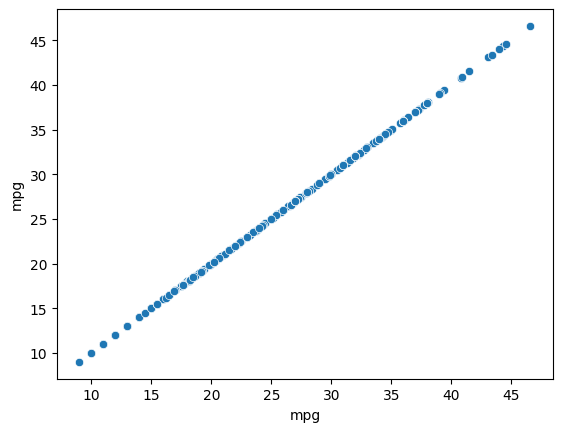

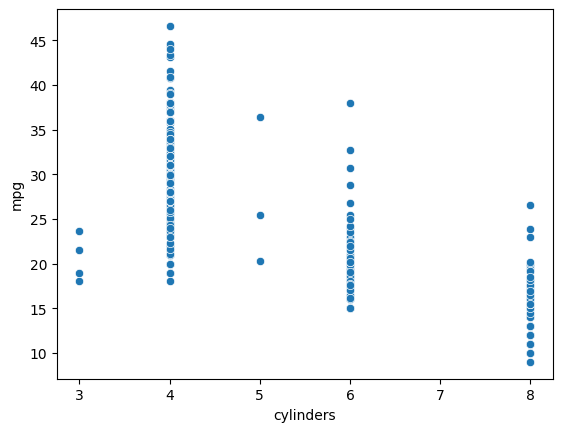

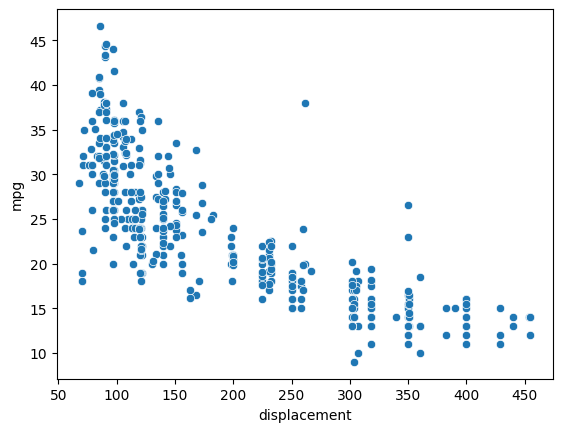

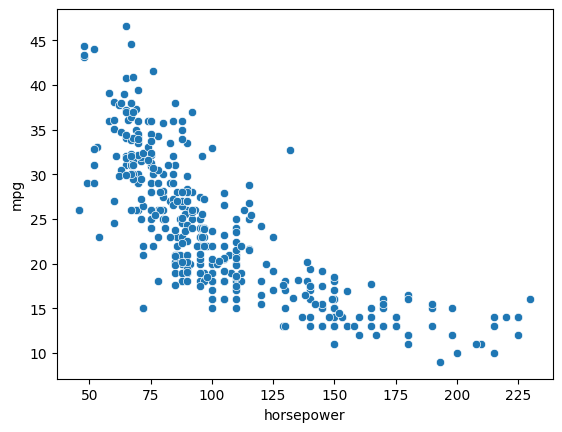

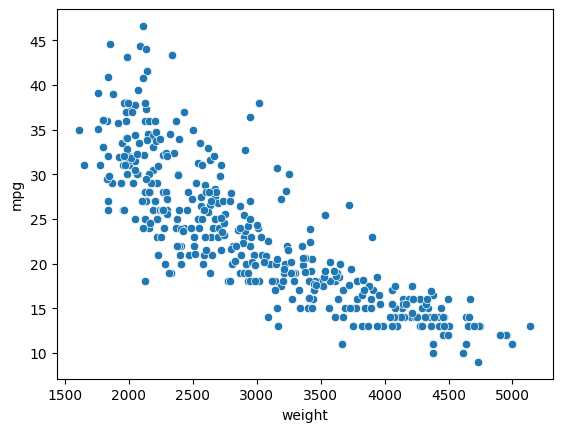

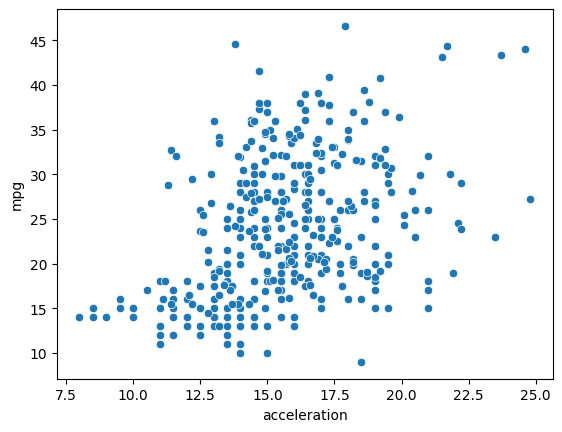

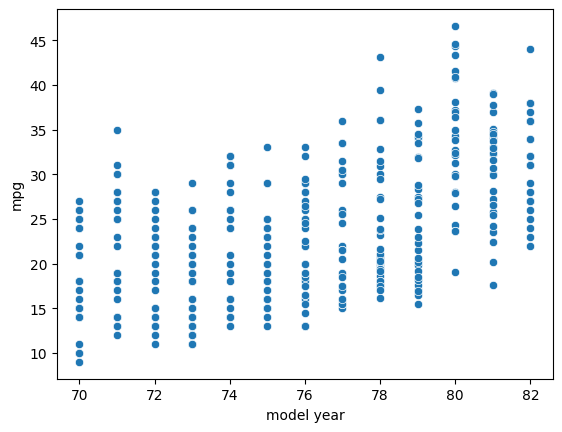

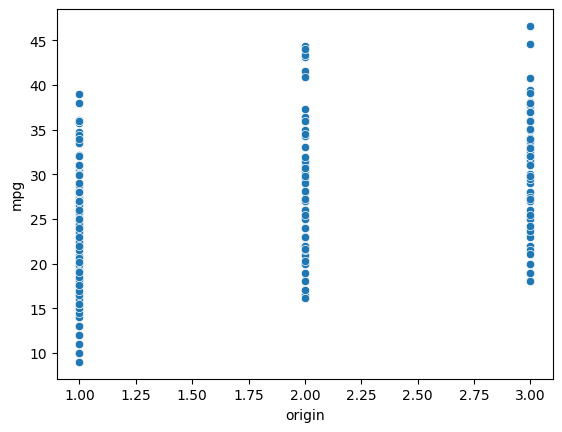

In [10]:
for col in df.columns:
    sns.scatterplot(x = col, y = 'mpg', data = df)
    plt.show()
    

Display the  Correlation


In [11]:
df.corr('kendall')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.686477,-0.679847,-0.678906,-0.694006,0.301096,0.413661,0.467249
cylinders,-0.686477,1.000000,0.794854,0.683636,0.735481,-0.367194,-0.273742,-0.551610
displacement,-0.679847,0.794854,1.000000,0.718464,0.800508,-0.352110,-0.218920,-0.570074
horsepower,-0.678906,0.683636,0.718464,1.000000,0.702753,-0.484228,-0.276309,-0.405218
weight,-0.694006,0.735481,0.800508,0.702753,1.000000,-0.268619,-0.196863,-0.496185
acceleration,0.301096,-0.367194,-0.352110,-0.484228,-0.268619,1.000000,0.196024,0.173055
model year,0.413661,-0.273742,-0.218920,-0.276309,-0.196863,0.196024,1.000000,0.136967
origin,0.467249,-0.551610,-0.570074,-0.405218,-0.496185,0.173055,0.136967,1.000000


In [11]:
list(df.columns)

['mpg',
 'cylinders',
 'displacement',
 'horsepower',
 'weight',
 'acceleration',
 'model year',
 'origin']

____________________________________________________________________________________________________________________________________________________________________________________________________________________

## Model 3 

Train  the data

In [14]:
y_3= df['mpg']
df_3 = df.drop(['mpg','weight','horsepower','cylinders','displacement',
'power_weight_ratio','model year','power_weight',], axis=1, inplace=True )

In [15]:
list(df_3.columns)


['acceleration',
 'origin',
 'displacement_per_cylinder',
 'displacement_power_weight']

In [16]:
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split( df_3, y_3, test_size=0.33, random_state=42)

Create a pipline 

In [21]:
pipe_3 = Pipeline(steps=[('scaler', StandardScaler(),),
                        ('Random_forest', RandomForestRegressor(n_estimators=100, 
                        criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1,
                        min_weight_fraction_leaf=0.0,
                        max_leaf_nodes=None, min_impurity_decrease=0.0,
                        bootstrap=True, oob_score=False, n_jobs= None, random_state= None, verbose=0,
                        warm_start=False, ccp_alpha=0.0,max_samples=None),)])

In [27]:
pipe_3.fit(X_train_3, y_train_3)

Pipeline(steps=[('scaler', StandardScaler()),
                ('Random_forest', RandomForestRegressor())])

Test the data

In [28]:
prediction_3 = pipe_3.predict(X_test_3)

In [29]:
mae_3 = mean_absolute_error(y_test_3, prediction_3)
r2_3 = r2_score(y_test_3, prediction_3)
mse_3 = mean_squared_error(y_test_3, prediction_3)
mape_3 = mean_absolute_percentage_error(y_test_3, prediction_3)

Represnation of % of the variance

In [30]:
r2_3

0.811278957791056

The result will be -+ the mean absolute error

In [31]:
mae_3

2.5180681818181827

Average error(must be as low as possible)

In [32]:
mse_3

10.862215098484844

How much it is off in persanage

In [33]:
mape_3

0.10468863858058794

In [23]:
X_train_3.columns

Index(['acceleration', 'origin', 'displacement_per_cylinder',
       'displacement_power_weight'],
      dtype='object')

____________________________________________________________________________________________________________________________________________________________________________________________________________________

## Model 4

In [12]:
y_4= df['mpg']
df_4  = df.drop('mpg', axis=1)
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split( df_4, y_4, test_size=0.33, random_state=42)

In [12]:
pipe_4 = Pipeline(steps=[('scaler', StandardScaler(),),
                        ('Random_forest', RandomForestRegressor(n_estimators=100, 
                        criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1,
                        min_weight_fraction_leaf=0.0,
                        max_leaf_nodes=None, min_impurity_decrease=0.0,
                        bootstrap=True, oob_score=False, n_jobs= None, random_state= None, verbose=0,
                        warm_start=False, ccp_alpha=0.0,max_samples=None),)])




In [14]:
pipe_4.fit(X_train_4, y_train_4)

Pipeline(steps=[('scaler', StandardScaler()),
                ('Random_forest', RandomForestRegressor())])

# save the model

In [25]:
filename = "MPG_automobile_0.88_model_randomForest.joblib"

In [29]:
joblib.dump(pipe_4, filename)

['MPG_automobile_0.88_model_randomForest.joblib']

# Load the model

In [13]:
loaded_model = joblib.load("MPG_automobile_0.88_model_randomForest.joblib")
result = loaded_model.score(X_test_4, y_test_4)


In [15]:
print("This the Prediction accuracy of this model : ",result)

This the Prediction accuracy of this model :  0.8852189559676944


In [15]:
prediction_4 = pipe_4.predict(X_test_4)
mae_4 = mean_absolute_error(y_test_4, prediction_4)
r2_4 = r2_score(y_test_4, prediction_4)
mse_4 = mean_squared_error(y_test_4, prediction_4)
mape_4 = mean_absolute_percentage_error(y_test_4, prediction_4)

In [18]:
r2_4


0.8852189559676944

In [19]:
mae_4


1.8619393939393933

In [20]:
mse_4


6.606451378787877

In [21]:
mape_4

0.08018727779203869